<a href="https://colab.research.google.com/github/seuriratcha/DataAnalytics_practice/blob/main/%08%EA%B0%95%EC%9D%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강의 데이터 분석 프로젝트

## 데이터 불러오기

In [ ]:
from google.colab import drive

import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)
%matplotlib inline
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
order = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXPORT/order.csv의 사본')
merged = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXPORT/merged.csv')
ordersbyday = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXPORT/ordersbyday.csv', header = None)
salesbyday = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXPORT/salesbyday.csv')

<ipython-input-4-593fb68cefa5>:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXPORT/merged.csv')


In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXPORT/customers.csv')

In [ ]:
refund = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXPORT/refunds.csv')

In [ ]:
course = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXPORT/courses.csv')

## **데이터 명세**
---

제공된 4개의 데이터를 아래와 같이 정의하였습니다.

* orders ⬇

|Column|Description|
|:---|:---|
|order_id|주문번호|
|customer_id|고객ID|
|type|주문종류|
|status|주문상태|
|course_id|강의id|
|name|강의 이름|
|created_at|주문 일시|
|updated_at|업데이트 일시|
|list_price|판매가격|
|sales_price|구매가격|
|discount_price|할인적용금액|

* customers ⬇

|Column|Description|
|:---|:---|
|id|고객ID|
|user_id|유저ID|
|state|활동상태(정상,휴면)|
|created_at|계정 생성 일시|
|updated_at|업데이트 일시|
|user_id2|고객id(문자열)|


* courses ⬇

|Column|Description|
|:---|:---|
|id|강의id|
|state|전시 상태|
|created_at|강의 생성 일시|
|updated_at|강의 업데이트 일시|
|title|강의 제목|
|description|강의 설명|
|total_class_hour|총 강의 시간|
|keyword|강의 키워드|


* refunds ⬇

|Column|Description|
|:---|:---|
|order_id|주문번호|
|refund_id|환불번호|
|refund_status|환불 상태|
|created_at|환불 일시|
|updated_at|업데이트 일시|
|course_id|강의id|
|amount|환불금액|

## Q1. Data Extract - SQL

### Q1-1. 4개의 테이블(order, customer, course, refund)을 하나의 테이블로 조인하는 쿼리를 작성해주세요.


* orders 테이블 중심으로 key 컬럼을 찾아 `Full outer join`으로 결합

```
SELECT *
FROM orders
FULL OUTER JOIN courses ON orders.course_id = courses.id
FULL OUTER JOIN customers ON orders.customer_id = customers.id
FULL OUTER JOIN refunds ON orders.order_id = refunds.order_id;
```

<img src = "https://drive.google.com/uc?id=1BFvPOMN9PlN-BUqaPvX0Wa3eZoSEYZh-" height = 600 width = 600>

In [ ]:
# output
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33372 entries, 0 to 33371
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           27894 non-null  float64
 1   customer_id        27894 non-null  float64
 2   type               27894 non-null  object 
 3   status             27894 non-null  object 
 4   course_id          27894 non-null  float64
 5   name               27893 non-null  object 
 6   created_at         27894 non-null  object 
 7   updated_at         27894 non-null  object 
 8   list_price         27894 non-null  float64
 9   sale_price         16161 non-null  float64
 10  discount_price     8371 non-null   float64
 11  id                 27947 non-null  float64
 12  state              27947 non-null  object 
 13  created_at.1       27947 non-null  object 
 14  updated_at.1       27947 non-null  object 
 15  title              27947 non-null  object 
 16  description        278

### Q1-2. (Order) 2022년 1월 일자별 가장 빠르게 신청된 강의(created_at)와 가장 나중에 신청된 강의를 볼 수 있는 쿼리를 작성해 주세요. (First_Value, Last_value, partition by)

```
WITH ordersbyday AS (
    SELECT
        CAST(o.created_at AS DATE) AS subscription_date,
        FIRST_VALUE(o.name) OVER (PARTITION BY CAST(o.created_at AS DATE) ORDER BY o.created_at ASC) AS fastest_lecture_name,
        FIRST_VALUE(o.created_at) OVER (PARTITION BY CAST(o.created_at AS DATE) ORDER BY o.created_at ASC) AS fastest_subscription_time,
        LAST_VALUE(o.name) OVER (PARTITION BY CAST(o.created_at AS DATE) ORDER BY o.created_at ASC ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_lecture_name,
        LAST_VALUE(o.created_at) OVER (PARTITION BY CAST(o.created_at AS DATE) ORDER BY o.created_at ASC ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS last_subscription_time,
        ROW_NUMBER() OVER (PARTITION BY CAST(o.created_at AS DATE) ORDER BY o.created_at) AS row_num
    FROM orders o
    WHERE o.created_at >= '2022-01-01' AND o.created_at < '2022-02-01'
)
SELECT
    subscription_date,
    MAX(CASE WHEN row_num = 1 THEN fastest_lecture_name END) AS fastest_subscribed_lecture,
    MAX(CASE WHEN row_num = 1 THEN fastest_subscription_time END) AS fastest_subscription_time,
    MAX(CASE WHEN row_num = 1 THEN last_lecture_name END) AS last_subscribed_lecture,
    MAX(CASE WHEN row_num = 1 THEN last_subscription_time END) AS last_subscription_time
FROM ordersbyday
GROUP BY subscription_date
ORDER BY subscription_date;
```

In [ ]:
# output
ordersbyday.head()

,0,1,2,3,4
0,2022-01-01,클라우드를 활용한,2022-01-01 00:08:00.0000000,[9일 한정할인],2022-01-01 23:38:00.0000000
1,2022-01-02,십분만에 끝낸다 십,2022-01-02 00:25:00.0000000,나의 칼퇴치트키 엑,2022-01-02 23:59:00.0000000
2,2022-01-03,한 번에 끝내는 딥,2022-01-03 00:00:00.0000000,한 번에 끝내는 데,2022-01-03 23:59:00.0000000
3,2022-01-04,초격차 패키지 :,2022-01-04 00:00:00.0000000,데이터베이스와 SQ,2022-01-04 23:57:00.0000000
4,2022-01-05,한 번에 끝내는 딥,2022-01-05 00:01:00.0000000,한 번에 끝내는 파,2022-01-05 23:58:00.0000000


### Q1-3. Order 테이블의 list_price를 일자별(created_at)로 합계한 후, 1일 전 과 1일 후의 매출을 column으로 만들어 주세요. (lead, lag)



```
WITH Sales AS (
    SELECT
        CONVERT(DATE, o.created_at) AS order_date,
        SUM(o.list_price) AS daily_sales,
        LAG(SUM(o.list_price)) OVER (ORDER BY CONVERT(DATE, o.created_at)) AS sales_day_before,
        LEAD(SUM(o.list_price)) OVER (ORDER BY CONVERT(DATE, o.created_at)) AS sales_day_after
    FROM orders o
    GROUP BY CONVERT(DATE, o.created_at)
)
SELECT
    order_date,
    daily_sales,
    COALESCE(sales_day_before, 0) AS sales_day_before,
    COALESCE(sales_day_after, 0) AS sales_day_after
FROM Sales
ORDER BY order_date;
```

In [ ]:
#output
salesbyday

,order_date,daily_sales,sales_day_before,sales_day_after
0,2022-01-01,95248000,0,125354000
1,2022-01-02,125354000,95248000,430094000
2,2022-01-03,430094000,125354000,319624430
3,2022-01-04,319624430,430094000,450775040
4,2022-01-05,450775040,319624430,289029000
5,2022-01-06,289029000,450775040,359411200
6,2022-01-07,359411200,289029000,200323470
7,2022-01-08,200323470,359411200,469754860
8,2022-01-09,469754860,200323470,120947500
9,2022-01-10,120947500,469754860,179021200


## Q2. Data Analysis - Python 2022년 1월 기준

#### **order 테이블 데이터 전처리**
> 1. 결측치/이상치 확인
2. 데이터 타입 확인 (날짜 등..)
3. 논리에 맞지 않는 데이터 있는지 확인 <br>
(ex.판매금액과 결제금액이 동일한데 할인 적용금액이 null값이 아닌 경우, 판매금액보다 결제금액이 높은 경우 등)
4. 할인율 파생칼럼 생성

In [ ]:
# created_at, updated_at 날짜 형식으로 변경
order['created_at'] = pd.to_datetime(order['created_at'])
order['updated_at'] = pd.to_datetime(order['updated_at'])
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27894 entries, 0 to 27893
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        27894 non-null  int64         
 1   customer_id     27894 non-null  int64         
 2   type            27894 non-null  object        
 3   status          27894 non-null  object        
 4   course_id       27894 non-null  int64         
 5   name            27894 non-null  object        
 6   created_at      27894 non-null  datetime64[ns]
 7   updated_at      27894 non-null  datetime64[ns]
 8   list_price      27894 non-null  int64         
 9   sale_price      16161 non-null  float64       
 10  discount_price  8371 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 2.3+ MB


In [ ]:
# 이상치 확인 (가격)
pd.options.display.float_format = '{:.2f}'.format
order.describe()

,order_id,customer_id,course_id,list_price,sale_price,discount_price
count,27894.00,27894.00,27894.00,27894.00,16161.00,8371.00
mean,810868.85,572342.47,205539.37,233196.12,185227.90,77707.30
std,23686.89,270107.45,2054.11,805420.33,540563.50,63654.32
min,773390.00,136.00,200260.00,20000.00,1000.00,1000.00
25%,789932.25,421664.50,203782.00,173000.00,133000.00,50000.00
50%,808481.50,735766.00,205648.00,206000.00,172000.00,50000.00
75%,830620.00,770294.50,207161.00,249000.00,214000.00,67600.00
max,853323.00,1204943.00,211503.00,66801784.00,66801784.00,559000.00


In [ ]:
# 가격이 과하게 크게 잡힌 부분 확인 -> B2B 선결제건으로 추정됨
order.sort_values(by='list_price', ascending=False).head()

,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price
9442,819834,116416,ORDER,CANCELLED,208188,(B2B) 하나금융,2022-01-17 04:34:00,2022-01-17 04:35:00,66801784,NaN,NaN
9432,819853,116416,ORDER,CANCELLED,208188,(B2B) 하나금융,2022-01-17 04:40:00,2022-01-17 04:41:00,66801784,NaN,NaN
8918,821913,116416,ORDER,COMPLETED,208188,(B2B) 하나금융,2022-01-18 05:09:00,2022-01-18 05:10:00,66801784,66801784.00,NaN
9536,819532,116416,ORDER,PENDING,208188,(B2B) 하나금융,2022-01-17 00:30:00,2022-01-17 00:30:00,66801784,NaN,NaN
8893,822045,777103,ORDER,COMPLETED,205771,패스트캠퍼스 x 서,2022-01-18 06:07:00,2022-01-18 06:08:00,8400000,8400000.00,NaN


In [ ]:
# 할인금액 이상한 부분 있는지 확인
order.sort_values(by='discount_price', ascending=False).head()

,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price
3917,842944,286688,ORDER,COMPLETED,206848,The RED :,2022-01-27 08:06:00,2022-01-27 08:06:00,729000,170000.00,559000.00
23520,784565,424130,ORDER,COMPLETED,206742,클라우드를 활용한,2022-01-04 23:25:00,2022-01-04 23:26:00,441000,41000.00,400000.00
26422,776672,51032,ORDER,COMPLETED,206742,클라우드를 활용한,2022-01-03 02:49:00,2022-01-03 02:50:00,441000,41000.00,400000.00
21794,787881,4682,ORDER,COMPLETED,206742,클라우드를 활용한,2022-01-05 14:36:00,2022-01-05 14:36:00,441000,41000.00,400000.00
20415,791456,459655,ORDER,COMPLETED,206742,클라우드를 활용한,2022-01-06 14:27:00,2022-01-06 14:28:00,441000,41000.00,400000.00


In [ ]:
# Order 'status' = COMPLETED 인 것만 확인
order_complete = order[order['status'] == 'COMPLETED']

In [ ]:
# 논리에 맞지 않는 데이터 확인

## 판매금액 = 결제금액 && 할인적용금액이 있는 경우 -> 없음
order_complete[(order_complete.list_price == order_complete.sale_price) & (order_complete.discount_price.notnull())]

,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price


In [ ]:
## 결제금액이 판매금액보다 큰 경우 -> 없음
order_complete[order_complete.sale_price > order_complete.list_price]

,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price


In [ ]:
## "list_price - sale_price = discount_price" 이 아닌 것 -> 없음
oc = order_complete[order_complete['list_price'] - order_complete['sale_price'] != order_complete['discount_price']]
oc['discount_price'].unique()

array([nan])

In [ ]:
# null값 없애기
order_complete['discount_price'].fillna(0, inplace=True)
order_complete['sale_price'].fillna(order_complete['list_price'] - order_complete['discount_price'], inplace=True)

# data 재확인
order_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16161 entries, 0 to 27893
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        16161 non-null  int64         
 1   customer_id     16161 non-null  int64         
 2   type            16161 non-null  object        
 3   status          16161 non-null  object        
 4   course_id       16161 non-null  int64         
 5   name            16161 non-null  object        
 6   created_at      16161 non-null  datetime64[ns]
 7   updated_at      16161 non-null  datetime64[ns]
 8   list_price      16161 non-null  int64         
 9   sale_price      16161 non-null  float64       
 10  discount_price  16161 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 1.5+ MB


<ipython-input-31-222e1fec64c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_complete['discount_price'].fillna(0, inplace=True)
<ipython-input-31-222e1fec64c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_complete['sale_price'].fillna(order_complete['list_price'] - order_complete['discount_price'], inplace=True)


In [ ]:
# 할인율 칼럼 생성하기
order_complete['discount_rate'] = (order_complete['discount_price'] / order_complete['list_price']) * 100
order_complete.head()

<ipython-input-32-e4cfa9b277ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_complete['discount_rate'] = (order_complete['discount_price'] / order_complete['list_price']) * 100


,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price,discount_rate
0,853323,791388,ORDER,COMPLETED,205080,나의 칼퇴치트키 엑,2022-01-31 23:52:00,2022-01-31 23:54:00,156000,136000.00,20000.00,12.82
1,853322,560400,ORDER,COMPLETED,205080,나의 칼퇴치트키 엑,2022-01-31 23:51:00,2022-01-31 23:51:00,156000,156000.00,0.00,0.00
3,853317,279538,ORDER,COMPLETED,206742,클라우드를 활용한,2022-01-31 23:39:00,2022-01-31 23:39:00,447000,447000.00,0.00,0.00
4,853314,790438,ORDER,COMPLETED,205761,한 번에 끝내는 디,2022-01-31 23:30:00,2022-01-31 23:31:00,261000,261000.00,0.00,0.00
6,853311,24156,ORDER,COMPLETED,208687,직장인이 진짜 필요,2022-01-31 23:21:00,2022-01-31 23:22:00,169000,149000.00,20000.00,11.83


### Q2-1 (Order) 2022년 1월 중 가장 매출이 높았던 3일과 낮았던 3일은 언제인가요? (status = COMPLETED 기준)

In [ ]:
# date 칼럼 생성
order_complete['created_at_date'] = order_complete['created_at'].dt.date
order_complete['updated_at_date'] = order_complete['updated_at'].dt.date

<ipython-input-17-5d13f8d748e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_complete['created_at_date'] = order_complete['created_at'].dt.date
<ipython-input-17-5d13f8d748e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_complete['updated_at_date'] = order_complete['updated_at'].dt.date


In [ ]:
# 상위 매출 3일, 하위 매출 3일 구하기
order_complete["created_at_date"] = pd.to_datetime(order_complete["created_at_date"])
top_3_days = order_complete.groupby('created_at_date')['list_price'].sum().nlargest(3)
bottom_3_days = order_complete.groupby('created_at_date')['list_price'].sum().nsmallest(3)

# 결과 합치기
result = pd.concat([top_3_days, bottom_3_days])

print(result)

created_at_date
2022-01-03    284255000
2022-01-09    261886930
2022-01-05    245899040
2022-01-22     37842240
2022-01-01     49548000
2022-01-23     54444580
Name: list_price, dtype: int64


<ipython-input-18-46b800bae1a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_complete["created_at_date"] = pd.to_datetime(order_complete["created_at_date"])


In [ ]:
# 매출 크게 잡힌 날 B2B 결제건 발생한 것 있는지 확인 -> 없음
order_complete[order_complete["created_at_date"]=="2022-01-03"].sort_values(by = 'list_price', ascending = False)

,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price,discount_rate,created_at_date,updated_at_date
26299,776995,758828,ORDER,COMPLETED,209207,The Front,2022-01-03 04:04:00,2022-01-03 04:04:00,1050000,1050000.00,0.00,0.00,2022-01-03,2022-01-03
26384,776769,758676,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-03 03:11:00,2022-01-03 03:12:00,793000,793000.00,0.00,0.00,2022-01-03,2022-01-03
25464,779359,678905,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-03 12:03:00,2022-01-03 12:03:00,793000,793000.00,0.00,0.00,2022-01-03,2022-01-03
25972,777946,759044,ORDER,COMPLETED,206848,The RED :,2022-01-03 07:07:00,2022-01-03 07:08:00,729000,679000.00,50000.00,6.86,2022-01-03,2022-01-03
26167,777340,758918,ORDER,COMPLETED,206814,라이팅 마스터 클래,2022-01-03 05:14:00,2022-01-03 05:14:00,470000,470000.00,0.00,0.00,2022-01-03,2022-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26267,777078,434992,ORDER,COMPLETED,209126,UX Explore,2022-01-03 04:20:00,2022-01-03 04:22:00,69000,69000.00,0.00,0.00,2022-01-03,2022-01-03
25965,777976,602116,ORDER,COMPLETED,209126,UX Explore,2022-01-03 07:11:00,2022-01-03 07:12:00,69000,69000.00,0.00,0.00,2022-01-03,2022-01-03
25749,778576,608897,ORDER,COMPLETED,208748,sudo : CTO,2022-01-03 09:12:00,2022-01-03 09:12:00,45000,45000.00,0.00,0.00,2022-01-03,2022-01-03
26350,776882,732094,ORDER,COMPLETED,208748,sudo : CTO,2022-01-03 03:36:00,2022-01-03 03:36:00,45000,45000.00,0.00,0.00,2022-01-03,2022-01-03


In [ ]:
# 매출 TOP3, Botto3 일자별 구매 건수 집계
## 매출과 거래량이 비례하는 것을 알 수 있음
order_complete[order_complete['created_at_date'].isin(['2022-01-03', '2022-01-09', '2022-01-05', '2022-01-22', '2022-01-01', '2022-01-23'])].groupby('created_at_date').count()['order_id']

created_at_date
2022-01-01     234
2022-01-03    1281
2022-01-05    1114
2022-01-09    1190
2022-01-22     170
2022-01-23     256
Name: order_id, dtype: int64

### Q2-2 (Order) 그리고 그 때의 매출액(list_price)과, 주문 수, 신청자 수, 강의 수는 각각 얼마인가요?

In [ ]:
order_complete[order_complete['created_at_date'].isin(['2022-01-03', '2022-01-09', '2022-01-05', '2022-01-22', '2022-01-01', '2022-01-23'])].groupby('created_at_date').agg(
    {'list_price' : 'sum', 'order_id': 'count', 'customer_id': lambda x: x.nunique(), 'course_id': lambda x: x.nunique()}).sort_values(by='list_price', ascending = False)

,list_price,order_id,customer_id,course_id
created_at_date,,,,
2022-01-03,284255000,1281,1186,213
2022-01-09,261886930,1190,1055,204
2022-01-05,245899040,1114,1014,208
2022-01-23,54444580,256,229,107
2022-01-01,49548000,234,220,107
2022-01-22,37842240,170,143,105


In [ ]:
# 일 평균 강의 판매금액 평균
## 1월22일에 고단가 강의 판매가 근소하게 더 많았던 것으로 보임
order_complete[order_complete['created_at_date'].isin(['2022-01-03', '2022-01-09', '2022-01-05', '2022-01-22', '2022-01-01', '2022-01-23'])].groupby('created_at_date').agg({'list_price': ['sum', 'mean']}).sort_values(("list_price", "mean"),ascending=False)

list_price          
                       sum      mean
created_at_date                     
2022-01-22        37842240 222601.41
2022-01-03       284255000 221900.86
2022-01-05       245899040 220735.22
2022-01-09       261886930 220073.05
2022-01-23        54444580 212674.14
2022-01-01        49548000 211743.59

### Q2-3 (Order) 각 강의 별 할인율은 어떻게 될까요?

In [ ]:
# 전처리로 만들어둔 할인율 칼럼
order_complete.sort_values(by='discount_rate', ascending = False)

,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price,discount_rate,created_at_date,updated_at_date
19940,793112,724762,ORDER,COMPLETED,204013,완전정복! 시각디자,2022-01-07 02:04:00,2022-01-07 02:05:00,249000,1000.00,248000.00,99.60,2022-01-07,2022-01-07
24463,782051,106722,ORDER,COMPLETED,203787,초격차 패키지 :,2022-01-04 06:31:00,2022-01-04 06:32:00,241000,1000.00,240000.00,99.59,2022-01-04,2022-01-04
26877,775860,734384,ORDER,COMPLETED,203525,한번에 끝내는 Ja,2022-01-02 23:53:00,2022-01-02 23:53:00,230000,1000.00,229000.00,99.57,2022-01-02,2022-01-02
26960,775716,166072,ORDER,COMPLETED,203525,한번에 끝내는 Ja,2022-01-02 20:22:00,2022-01-02 20:23:00,230000,1000.00,229000.00,99.57,2022-01-02,2022-01-02
21422,788720,713871,ORDER,COMPLETED,203525,한번에 끝내는 Ja,2022-01-06 01:02:00,2022-01-06 01:03:00,230000,1000.00,229000.00,99.57,2022-01-06,2022-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12960,811178,469344,ORDER,COMPLETED,207161,편집녀 프리미어 끝,2022-01-13 07:54:00,2022-01-13 07:57:00,329000,329000.00,0.00,0.00,2022-01-13,2022-01-13
12965,811153,58561,ORDER,COMPLETED,203535,한 번에 끝내는 P,2022-01-13 07:41:00,2022-01-13 07:41:00,142000,142000.00,0.00,0.00,2022-01-13,2022-01-13
12968,811143,42460,ORDER,COMPLETED,204871,star741의 캐,2022-01-13 07:35:00,2022-01-13 07:35:00,239000,239000.00,0.00,0.00,2022-01-13,2022-01-13
12977,811132,379493,ORDER,COMPLETED,203355,처음부터 시작하는,2022-01-13 07:28:00,2022-01-13 07:29:00,176000,176000.00,0.00,0.00,2022-01-13,2022-01-13


In [ ]:
# 할인율
order_complete['discount_rate'].describe()

count   16161.00
mean       18.68
std        26.15
min         0.00
25%         0.00
50%         7.97
75%        25.13
max        99.60
Name: discount_rate, dtype: float64

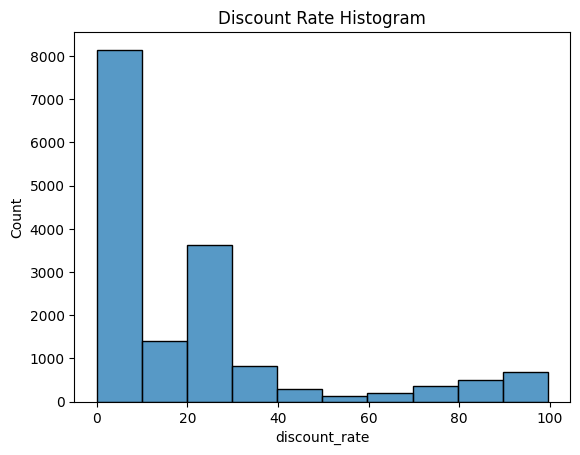

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(order_complete['discount_rate'], bins=10)
plt.title('Discount Rate Histogram')
plt.show()

### Q2-4 (Customer) 회원들은 주로 몇시에 회원 가입을 했나요?

#### customer 데이터 전처리

In [ ]:
# 컬럼명 바꾸기
customer.rename(columns={'user_id.1':'user_name', 'id':'customer_id'}, inplace = True)
customer.head()

,customer_id,user_id,state,created_at,updated_at,user_name,created_at_hour
0,23139,12,NORMAL,2019-09-23 23:21:00,2023-05-01 06:20:00,iolo,23
1,23179,18,NORMAL,2019-09-24 02:05:00,2019-09-24 02:05:00,smki,2
2,18948,25,NORMAL,2019-09-09 08:27:00,2023-01-25 07:17:00,haed,8
3,17531,424,NORMAL,2019-09-07 10:10:00,2023-10-19 01:13:00,gkaw,10
4,23028,1103,NORMAL,2019-09-23 08:45:00,2022-11-21 20:39:00,kang,8


In [ ]:
# datetime 형식으로 변경
customer["created_at"] = pd.to_datetime(customer["created_at"], format='%Y-%m-%d %H:%M')
customer["updated_at"] = pd.to_datetime(customer["updated_at"], format='%Y-%m-%d %H:%M')

In [ ]:
customer.dtypes

customer_id                 int64
user_id                     int64
state                      object
created_at         datetime64[ns]
updated_at         datetime64[ns]
user_name                  object
created_at_hour             int64
dtype: object

In [ ]:
# 시 추출하기
customer['created_at_hour']=customer['created_at'].dt.hour

In [ ]:
customer.head()

,customer_id,user_id,state,created_at,updated_at,user_name,created_at_hour
0,23139,12,NORMAL,2019-09-23 23:21:00,2023-05-01 06:20:00,iolo,23
1,23179,18,NORMAL,2019-09-24 02:05:00,2019-09-24 02:05:00,smki,2
2,18948,25,NORMAL,2019-09-09 08:27:00,2023-01-25 07:17:00,haed,8
3,17531,424,NORMAL,2019-09-07 10:10:00,2023-10-19 01:13:00,gkaw,10
4,23028,1103,NORMAL,2019-09-23 08:45:00,2022-11-21 20:39:00,kang,8


#### 회원가입 시간 구하기

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19684 entries, 0 to 19683
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               19684 non-null  int64         
 1   user_id          19684 non-null  int64         
 2   state            19684 non-null  object        
 3   created_at       19684 non-null  datetime64[ns]
 4   updated_at       19684 non-null  datetime64[ns]
 5   user_name        19684 non-null  object        
 6   created_at_hour  19684 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
customer['created_at_hour'].unique()

array([23,  2,  8, 10,  9, 14, 15,  1,  4,  5,  0, 13, 12,  3,  6, 11, 17,
       16, 21,  7, 18, 22, 19, 20])

In [ ]:
customer['created_at_hour'].value_counts()

13    1311
14    1302
12    1253
7     1197
6     1195
5     1161
8     1128
4     1086
2     1086
1     1077
11    1061
9     1005
10     984
3      881
15     817
0      785
23     504
16     503
17     335
22     280
18     247
21     183
19     152
20     151
Name: created_at_hour, dtype: int64

<Axes: xlabel='created_at_hour', ylabel='count'>

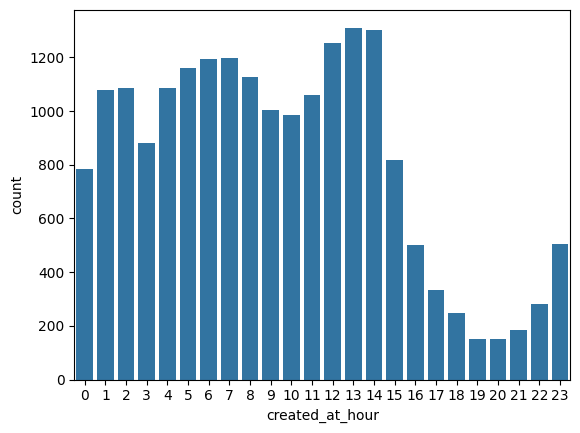

In [ ]:
sns.countplot(x = customer["created_at_hour"])

### Q2-5 (Refund) 환불이 가장 많은 강의는 어떤 강의였나요?

In [ ]:
# refund에 강의명 컬럼 붙이기
refund_merge = refund.merge(order[['order_id', 'name']], on='order_id', how='left')

In [ ]:
refund_merge.head()

,order_id,refund_id,refund_status,created_at,updated_at,course_id,amount,name
0,773436,45470,COMPLETED,2022-01-06 9:46,2022-01-06 9:46,206185.00,-241000,한 번에 끝내는 머
1,773451,45382,COMPLETED,2022-01-06 5:24,2022-01-06 5:24,203146.00,-210000,The RED :
2,773507,44996,COMPLETED,2022-01-03 6:23,2022-01-03 6:23,205949.00,-132205,30개 프로젝트로
3,773520,46333,COMPLETED,2022-01-17 4:41,2022-01-17 4:41,203782.00,-120666,한번에 끝내는 모션
4,773529,45256,COMPLETED,2022-01-05 8:59,2022-01-05 8:59,206060.00,-212000,한 번에 끝내는 컴


In [ ]:
# 동일한 강의명에 course_id가 2개 이상인 데이터가 있는 것 같음
print(refund_merge['course_id'].nunique())
print('-----')
print(refund_merge['name'].nunique())

215
-----
171


In [ ]:
# 1개 강의에 여러개의 course_id 있는 데이터 확인 -> course_id 기준으로 확인해야 함
refund_merge.groupby('name').agg(count_courses_id=('course_id', 'nunique')).sort_values(by='count_courses_id', ascending = False)

,count_courses_id
name,
The RED :,21
올인원 패키지 :,11
초격차 패키지 :,6
한 번에 끝내는 데,3
30개 프로젝트로,3
...,...
디자인 기초 체력,1
디자인의 차이를 만,1
딥러닝을 활용한 추,1


In [ ]:
# 환불이 가장 많은 강의 = '한 번에 끝내는 프' (203720)
refund_merge.groupby(['course_id','name']).agg(refund_counts=('refund_id','count')).sort_values(by='refund_counts', ascending=False)

,,refund_counts
course_id,name,
203720.00,한 번에 끝내는 프,31
207513.00,블렌더로 만드는 동,24
208856.00,30개 프로젝트로,20
205761.00,한 번에 끝내는 디,18
205949.00,30개 프로젝트로,17
...,...,...
202712.00,통계와 엑셀을 활용,1
202725.00,논리적인 디자인을,1
205816.00,강필성의 머신러닝,1


### Q2-6 (Customer) 강의를 가장 많이 신청한 고객과 그 금액은 얼마인가요?

In [ ]:
# 가장 많이 신청한 고객
order_complete.groupby('customer_id').agg(order_id_count=('order_id', 'count'), list_price_sum=('list_price', 'sum')).sort_values(by = 'order_id_count', ascending = False)

,order_id_count,list_price_sum
customer_id,,
779700,19,5152000
734503,13,3472000
759313,12,2364000
66504,12,2817000
584712,12,2794000
...,...,...
630801,1,193000
630854,1,389000
630898,1,195000


In [ ]:
# 주문 금액이 가장 높은 고객
order_complete.groupby('customer_id').agg(order_id_count=('order_id', 'count'), list_price_sum=('list_price', 'sum')).sort_values(by = 'list_price_sum', ascending = False)

,order_id_count,list_price_sum
customer_id,,
116416,2,71121784
777103,1,8400000
41519,8,5675000
785090,1,5280000
779700,19,5152000
...,...,...
272087,1,22200
51950,1,22200
784001,1,22200


In [ ]:
# 주문 금액 상위 4개 확인
order_complete[order_complete.customer_id.isin([116416, 777103, 41519, 785090])]

# '41519' 제외한 3개 고객은 B2B 고객인 것 같음

,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price,discount_rate
773,852042,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 11:43:00,2022-01-31 11:44:00,570000,570000.00,0.00,0.00
778,852034,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 11:42:00,2022-01-31 11:43:00,793000,793000.00,0.00,0.00
945,851712,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 10:05:00,2022-01-31 10:05:00,570000,570000.00,0.00,0.00
951,851703,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 10:03:00,2022-01-31 10:04:00,793000,793000.00,0.00,0.00
955,851695,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 10:01:00,2022-01-31 10:01:00,570000,570000.00,0.00,0.00
962,851676,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 09:58:00,2022-01-31 09:58:00,793000,793000.00,0.00,0.00
3139,845977,785090,ORDER,COMPLETED,209948,(B2B) 크몽 온,2022-01-28 08:07:00,2022-01-28 08:08:00,5280000,5280000.00,0.00,0.00
8893,822045,777103,ORDER,COMPLETED,205771,패스트캠퍼스 x 서,2022-01-18 06:07:00,2022-01-18 06:08:00,8400000,8400000.00,0.00,0.00
8918,821913,116416,ORDER,COMPLETED,208188,(B2B) 하나금융,2022-01-18 05:09:00,2022-01-18 05:10:00,66801784,66801784.00,0.00,0.00
9440,819837,116416,ORDER,COMPLETED,208188,하나금융티아이_DT,2022-01-17 04:35:00,2022-01-17 04:37:00,4320000,4320000.00,0.00,0.00


In [ ]:
# '41519'는 왜 같은 강의를 계속 샀는가?..
order[order['customer_id']==41519]

,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price
773,852042,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 11:43:00,2022-01-31 11:44:00,570000,570000.00,NaN
778,852034,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 11:42:00,2022-01-31 11:43:00,793000,793000.00,NaN
945,851712,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 10:05:00,2022-01-31 10:05:00,570000,570000.00,NaN
951,851703,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 10:03:00,2022-01-31 10:04:00,793000,793000.00,NaN
952,851702,41519,ORDER,PENDING,205423,권오상의 재무분석,2022-01-31 10:03:00,2022-01-31 10:03:00,793000,NaN,NaN
953,851700,41519,ORDER,PENDING,205423,권오상의 재무분석,2022-01-31 10:02:00,2022-01-31 10:02:00,793000,NaN,NaN
955,851695,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 10:01:00,2022-01-31 10:01:00,570000,570000.00,NaN
962,851676,41519,ORDER,COMPLETED,205423,권오상의 재무분석,2022-01-31 09:58:00,2022-01-31 09:58:00,793000,793000.00,NaN
975,851656,41519,ORDER,PENDING,203655,권오상의 재무분석,2022-01-31 09:52:00,2022-01-31 09:52:00,570000,NaN,NaN
17227,800268,41519,ORDER,COMPLETED,205053,권오상의 재무분석,2022-01-09 08:03:00,2022-01-09 08:04:00,793000,793000.00,NaN


### Q2-7 (Order) 주말과 주중의 평균 강의 신청율은 어떻게 다를까요?

In [ ]:
# "평균 강의 신청율" 개념에 대해 정의를 내리지 못했습니다,,
# 문제 의도가 전체 order status (COMPLETED,PENDING,CANCLED) 중 COMPLETED의 비율, 전환율에 관련된 값을 구하는 것인지..
# 아니면 요일별 강의 신청 비율을 구하는 것인지 헷갈렸습니다!..

In [ ]:
# order_complete에서 요일 추출하기
order_complete['created_at_day'] = order_complete['created_at'].dt.day_name()
order_complete.head()

<ipython-input-102-2ad7e49d7d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_complete['created_at_day'] = order_complete['created_at'].dt.day_name()


,order_id,customer_id,type,status,course_id,name,created_at,updated_at,list_price,sale_price,discount_price,discount_rate,created_at_day
0,853323,791388,ORDER,COMPLETED,205080,나의 칼퇴치트키 엑,2022-01-31 23:52:00,2022-01-31 23:54:00,156000,136000.00,20000.00,12.82,Monday
1,853322,560400,ORDER,COMPLETED,205080,나의 칼퇴치트키 엑,2022-01-31 23:51:00,2022-01-31 23:51:00,156000,156000.00,0.00,0.00,Monday
3,853317,279538,ORDER,COMPLETED,206742,클라우드를 활용한,2022-01-31 23:39:00,2022-01-31 23:39:00,447000,447000.00,0.00,0.00,Monday
4,853314,790438,ORDER,COMPLETED,205761,한 번에 끝내는 디,2022-01-31 23:30:00,2022-01-31 23:31:00,261000,261000.00,0.00,0.00,Monday
6,853311,24156,ORDER,COMPLETED,208687,직장인이 진짜 필요,2022-01-31 23:21:00,2022-01-31 23:22:00,169000,149000.00,20000.00,11.83,Monday


In [ ]:
# 요일별 강의 신청 개수
order_week = order_complete.groupby('created_at_day').agg(order_id_count=('order_id', 'count')).sort_values(by = 'order_id_count', ascending = False)
order_week

,order_id_count
created_at_day,
Monday,3090
Sunday,3072
Friday,2453
Wednesday,2144
Tuesday,1889
Thursday,1879
Saturday,1634


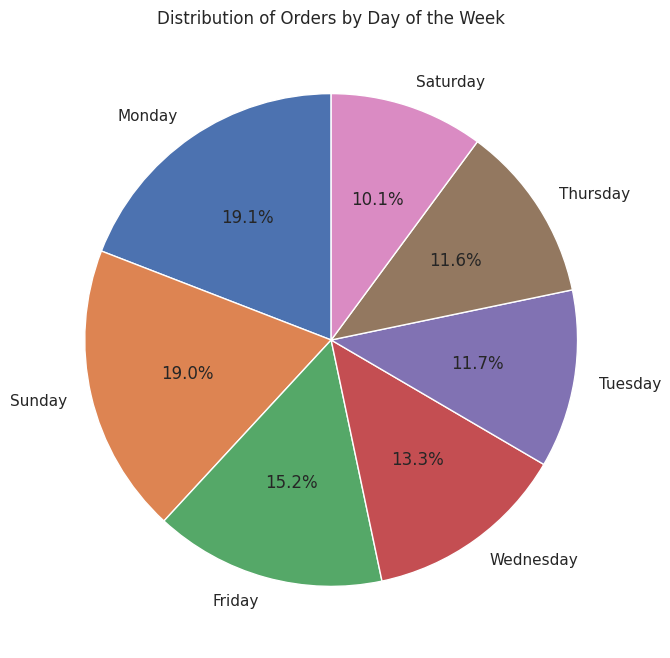

In [ ]:
import matplotlib.pyplot as plt

# 파이차트 그려보기
plt.figure(figsize=(8, 8))
plt.pie(order_week['order_id_count'], labels=order_week.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Orders by Day of the Week')
plt.show()

### Q2-8 (Course) Keyword 열에서 가장 많이 반복되는 단어는 어떤 단어인가요?

In [ ]:
course.sample(5)

,id,state,created_at,updated_at,title,description,close_at,total_class_hours,keywords
89,208854,ONGOING,2021-11-22 1:49,2023-06-01 1:33,The RED :,Youtube 본사,NaN,5.0,"PM,프로덕트매니저,서비스기획,서비스기획자,PO,Productmanager,더레드,..."
159,206356,ONGOING,2021-07-09 9:01,2023-10-22 9:43,세계 3등에게 배우,초보자도 30분 만,NaN,15.0,"데이터시각화,태블로,포트폴리오,전서연,대시보드,데이터시각화툴,데이터 시각화 툴,데이..."
128,207668,HIDDEN,2021-09-16 1:59,2022-11-02 1:45,영상PD에게 배우는,"광고, MV 등 영",NaN,53.0,"평생소장,촬영/편집,영상제작,영상, 3D, 영상 편집"
49,209711,ONGOING,2022-01-09 13:05,2023-06-01 1:12,메가바이트 스쿨 A,메가바이트 스쿨 A,NaN,NaN,"딥러닝,영상인식,파이썬,자율주행,데이터사이언스,인공지능"
278,203178,HIDDEN,2020-08-18 8:32,2023-07-10 23:57,한번에 끝내는 영상,기획/촬영부터 편집,NaN,57.0,"용호수,영상,3D,영상 편집"


In [ ]:
# 키워드 str으로 결합
all_keywords = ','.join(course['keywords'].dropna().astype(str))

# 단어 쪼개기
all_words = all_keywords.split(', ')

# Counter 패키지 사용
word_counts = Counter(all_words)

# 가장 많이 반복되는 단어
most_common_word, count = word_counts.most_common(1)[0]

print(f"가장 많이 반복되는 단어는 '{most_common_word}', {count} 회 나왔음")

가장 많이 반복되는 단어는 '3D', 7 회 나왔음


In [ ]:
word_counts.most_common(5)

[('3D', 7), ('콘텐츠 마케터', 4), ('콘텐츠마케팅', 4), ('콘텐츠 마케팅', 4), ('주니어', 4)]

### Q2-9 (Order) 강의 가격(list_price)을 5만원 단위의 도수분포표로 나타내 주세요.

In [ ]:
# list_price 최소, 최대값 찾기
print(order['list_price'].min())
print(order['list_price'].max())

20000
66801784


In [ ]:
# bis = 5만원 단위
bins = list(range(0, 66850001, 50000))

# 도수분포표 만들기
frequency_table = pd.cut(order['list_price'], bins=bins).value_counts().sort_index()

print(frequency_table)

(0, 50000]                73
(50000, 100000]          451
(100000, 150000]        2164
(150000, 200000]        9504
(200000, 250000]        9788
                        ... 
(66600000, 66650000]       0
(66650000, 66700000]       0
(66700000, 66750000]       0
(66750000, 66800000]       0
(66800000, 66850000]       4
Name: list_price, Length: 1337, dtype: int64


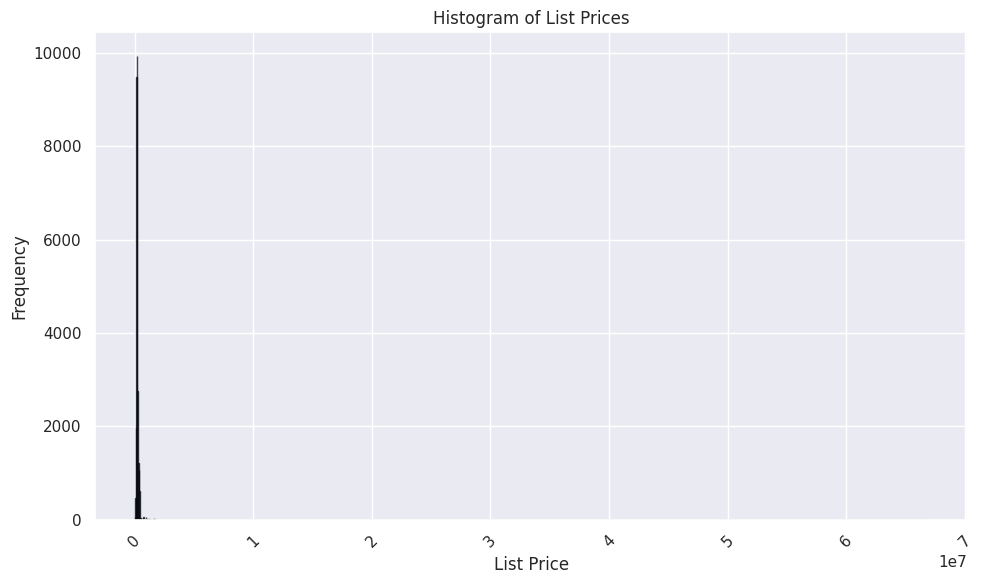

In [ ]:
# 히스토그램 확인 -> B2B data로 인해 정확한 분포 확인 어려움
plt.figure(figsize=(10, 6))
plt.hist(order['list_price'], bins=bins, edgecolor='black', alpha=0.7)
plt.title('Histogram of List Prices')
plt.xlabel('List Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

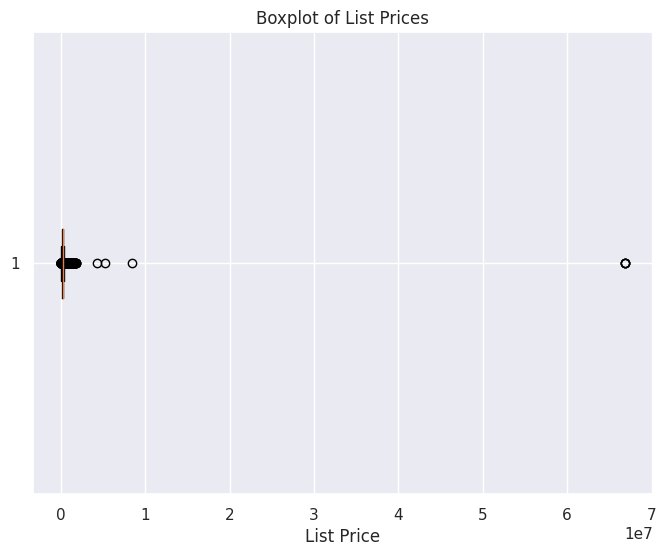

In [ ]:
# 박스플롯 확인

plt.figure(figsize=(8, 6))
plt.boxplot(order['list_price'], vert=False)
plt.title('Boxplot of List Prices')
plt.xlabel('List Price')
plt.grid(True)
plt.show()

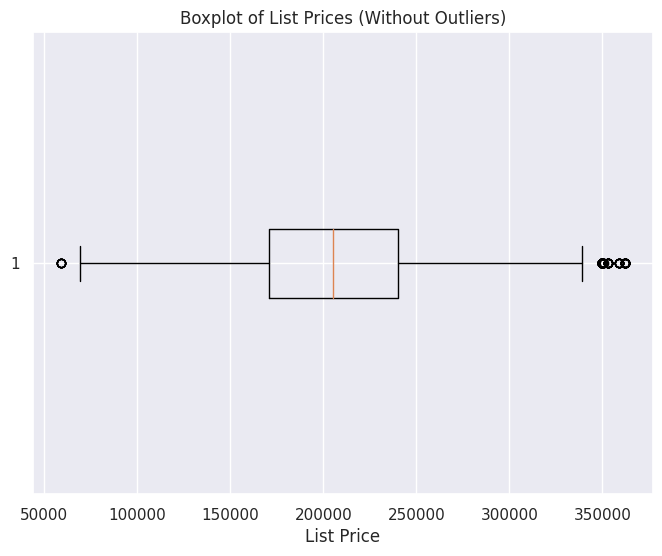

In [ ]:
# 사분위수 활용하여 이상치 데이터 제외하고 분포 확인
Q1 = order['list_price'].quantile(0.25)
Q3 = order['list_price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 아웃라이어 제외한 df 생성
order_no_outliers = order[(order['list_price'] >= lower_bound) & (order['list_price'] <= upper_bound)]

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(order_no_outliers['list_price'], vert=False)
plt.title('Boxplot of List Prices (Without Outliers)')
plt.xlabel('List Price')
plt.grid(True)
plt.show()

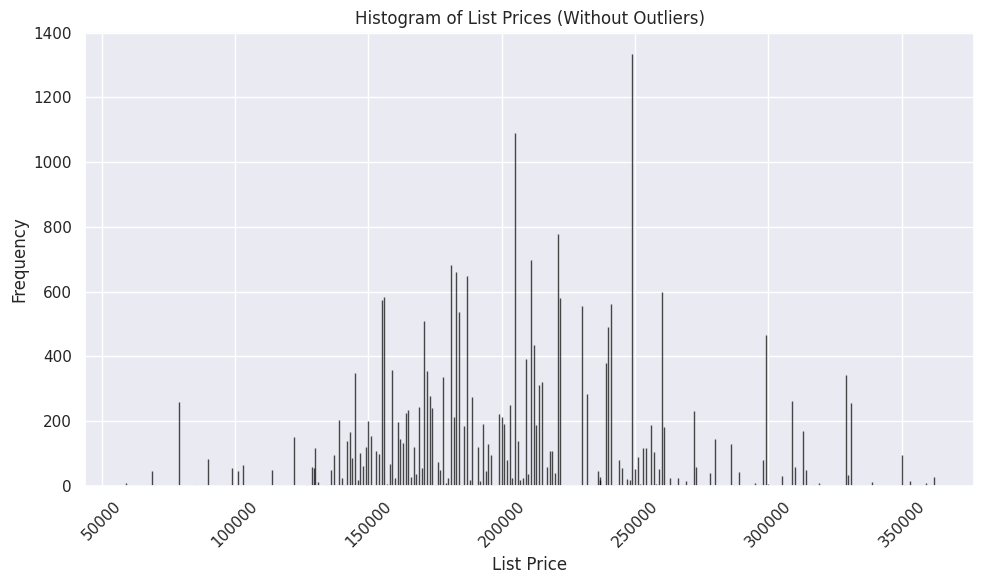

In [ ]:
# 히스토그램 그려보기
plt.figure(figsize=(10, 6))
plt.hist(order_no_outliers['list_price'], bins=50000, edgecolor='black', alpha=0.7)
plt.title('Histogram of List Prices (Without Outliers)')
plt.xlabel('List Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Q2-10 (Order) 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중은 각각 어떻게 될까요?

In [ ]:
# status별 금액 비중 구하기
status_price = order[['status','list_price']]
status_price = order.groupby('status')['list_price'].sum().reset_index()
status_price

,status,list_price
0,CANCELLED,1655615498
1,COMPLETED,3643955954
2,PENDING,1205201204


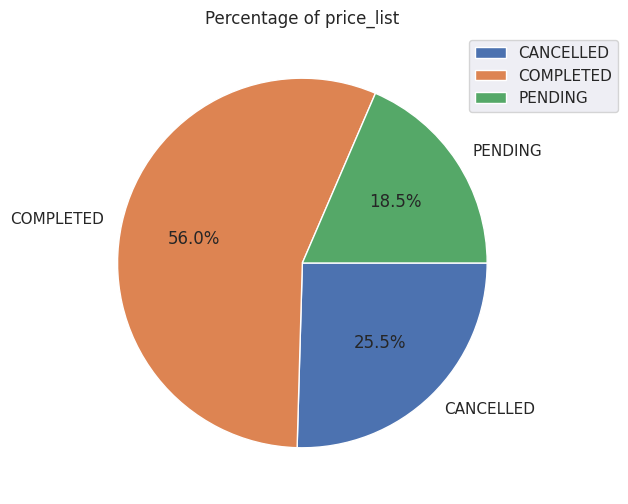

In [ ]:
# 파이차트 시각화
fig = plt.figure(figsize = (6, 6))
fig.set_facecolor('white')
ax = fig.add_subplot()

# 파이차트 출력
ax.pie(status_price.list_price,
       labels=status_price.status,
       startangle=0,
       counterclock = False,
       autopct = lambda p : '{:.1f}%'.format(p)
       )
plt.title('Percentage of price_list')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.show()

In [ ]:
# status 유저 수 비중 구하기
status_customer = order[['status','customer_id']]
status_customer = order.groupby('status')['customer_id'].nunique().reset_index()
status_customer

,status,customer_id
0,CANCELLED,4164
1,COMPLETED,13262
2,PENDING,2762


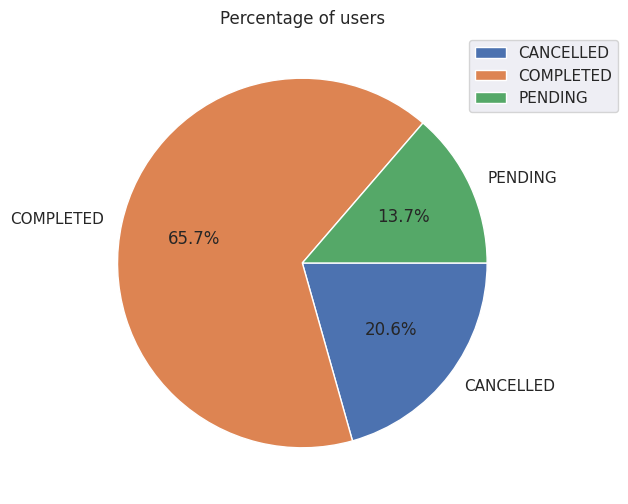

In [ ]:
# 파이차트 시각화
fig = plt.figure(figsize = (6, 6))
fig.set_facecolor('white')
ax = fig.add_subplot()

# 파이차트 출력
ax.pie(status_customer.customer_id,
       labels=status_customer.status,
       startangle=0,
       counterclock = False,
       autopct = lambda p : '{:.1f}%'.format(p)
       )
plt.title('Percentage of users')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.show()


## Q3. Data Visualization - Excel, Tableau, Power BI, python(matplolib, seaborn)
Q2에 대한 답을 하면서 적절하다고 생각하는 차트를 만들어주세요

*  [**Power BI 대시보드 링크**](https://app.powerbi.com/view?r=eyJrIjoiZmMyNzBiODctODczMy00MDVjLTgzY2QtNTcxODI0NmY3ZTRkIiwidCI6ImU4YjA0NDI0LTQyYjktNDc1Zi04NDQ2LTkzNjY2NWJmNjMzYyJ9)

## Q4. Analytics Report
데이터를 보면서 데이터 분석가로서 찾아낸 인사이트를 공유해주세요. 데이터 분석가마다 보는 관점이 다르고 나타내는 방법도 다양합니다. 데이터 분석을 잘 모르는 비즈니스 유저에게 본인의 분석 결과를 설명한다고 가정하고 어떤 제안을 할 수 있는지 생각해 보면 좋을 것 같습니다.

In [ ]:
# TBD....